In [2]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[10., -10., 20.],
                   [20., 0., 0.],
                   [0., 10., -10.]])

In [3]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [4]:
X_transformed = scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [5]:
X_train.std()

10.657403385139377

In [6]:
X_transformed.std()

1.0

In [7]:
X_train.mean(axis=0)

array([10.        ,  0.        ,  3.33333333])

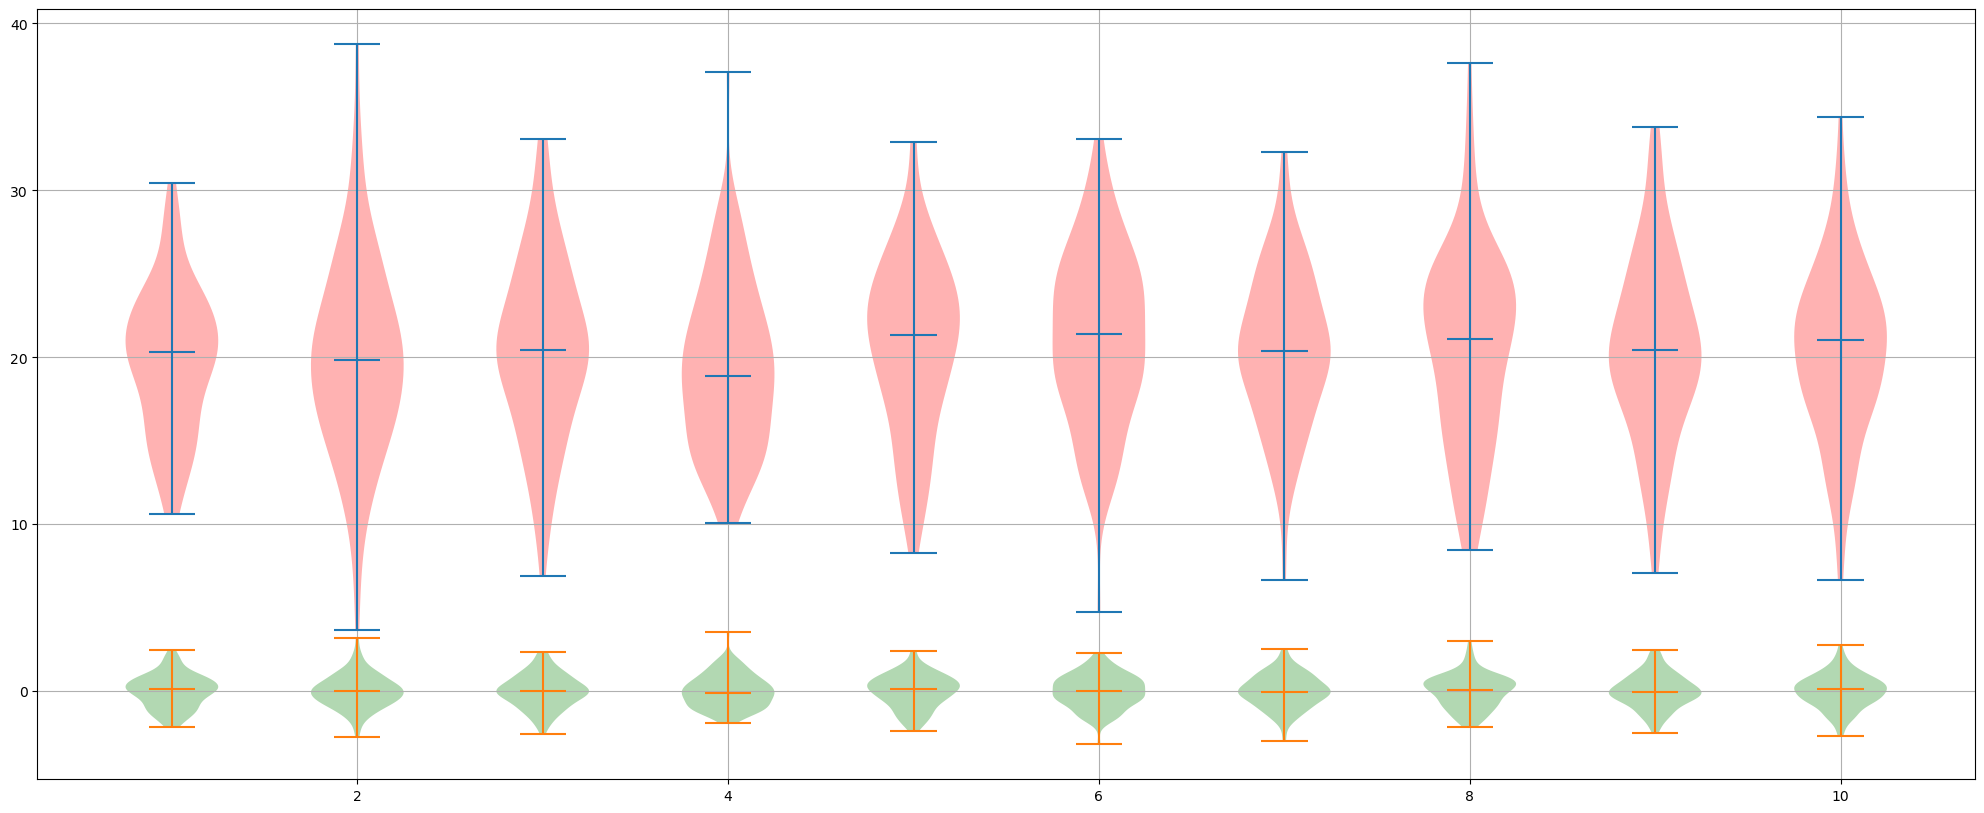

In [9]:
import matplotlib.pyplot as plt
sample = np.random.randn(100,10)*5 + 20

plt.figure(figsize=(25,10))
plt.grid()
violin_parts = plt.violinplot(sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    
scaled_sample = preprocessing.StandardScaler().fit_transform(sample)

violin_parts = plt.violinplot(scaled_sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [12]:
min_max_scaler = preprocessing.MinMaxScaler((-5,5))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[ 0.        , -5.        ,  5.        ],
       [ 5.        ,  0.        , -1.66666667],
       [-5.        ,  5.        , -5.        ]])

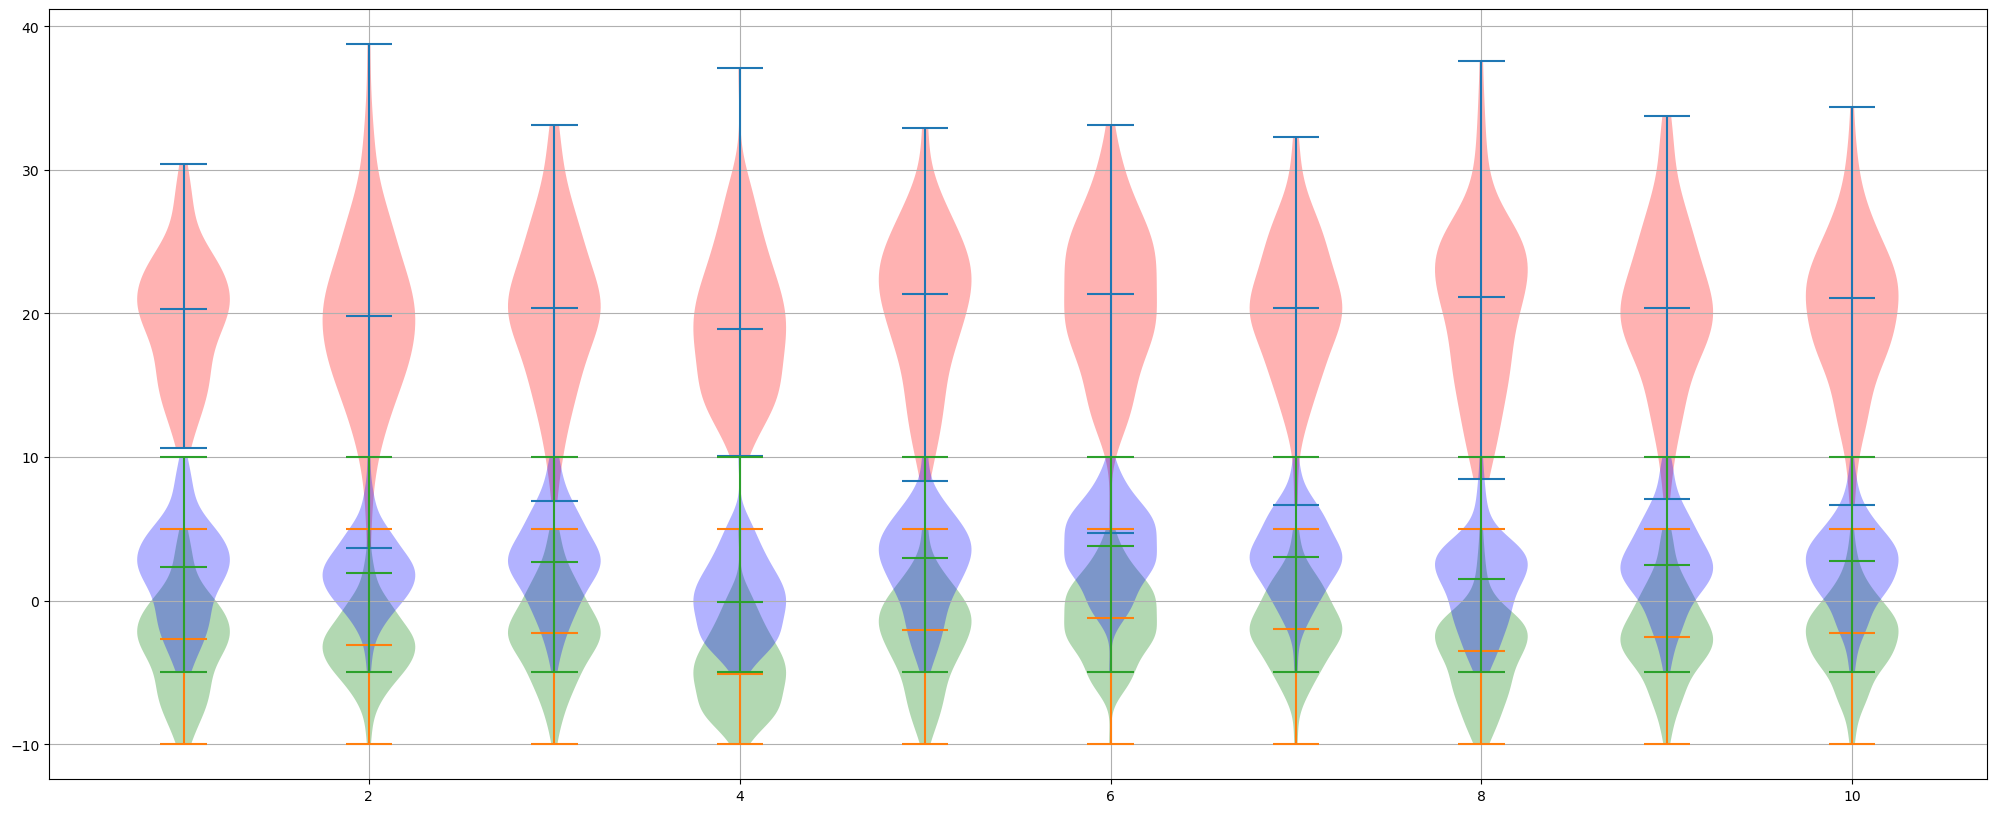

In [14]:
plt.figure(figsize=(25,10))
plt.grid()
violin_parts = plt.violinplot(sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')

scaled_sample_1 = preprocessing.MinMaxScaler((-10,5)).fit_transform(sample)
scaled_sample_2 = preprocessing.MinMaxScaler((-5,10)).fit_transform(sample)

violin_parts = plt.violinplot(scaled_sample_1[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')
    
violin_parts = plt.violinplot(scaled_sample_2[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('blue')

In [15]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

In [16]:
sample = np.random.randn(100,10)

In [17]:
sample_transformed = quantile_transformer.fit_transform(sample)

C:\Users\gaponovpavel\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [18]:
quantiles = np.arange(100)

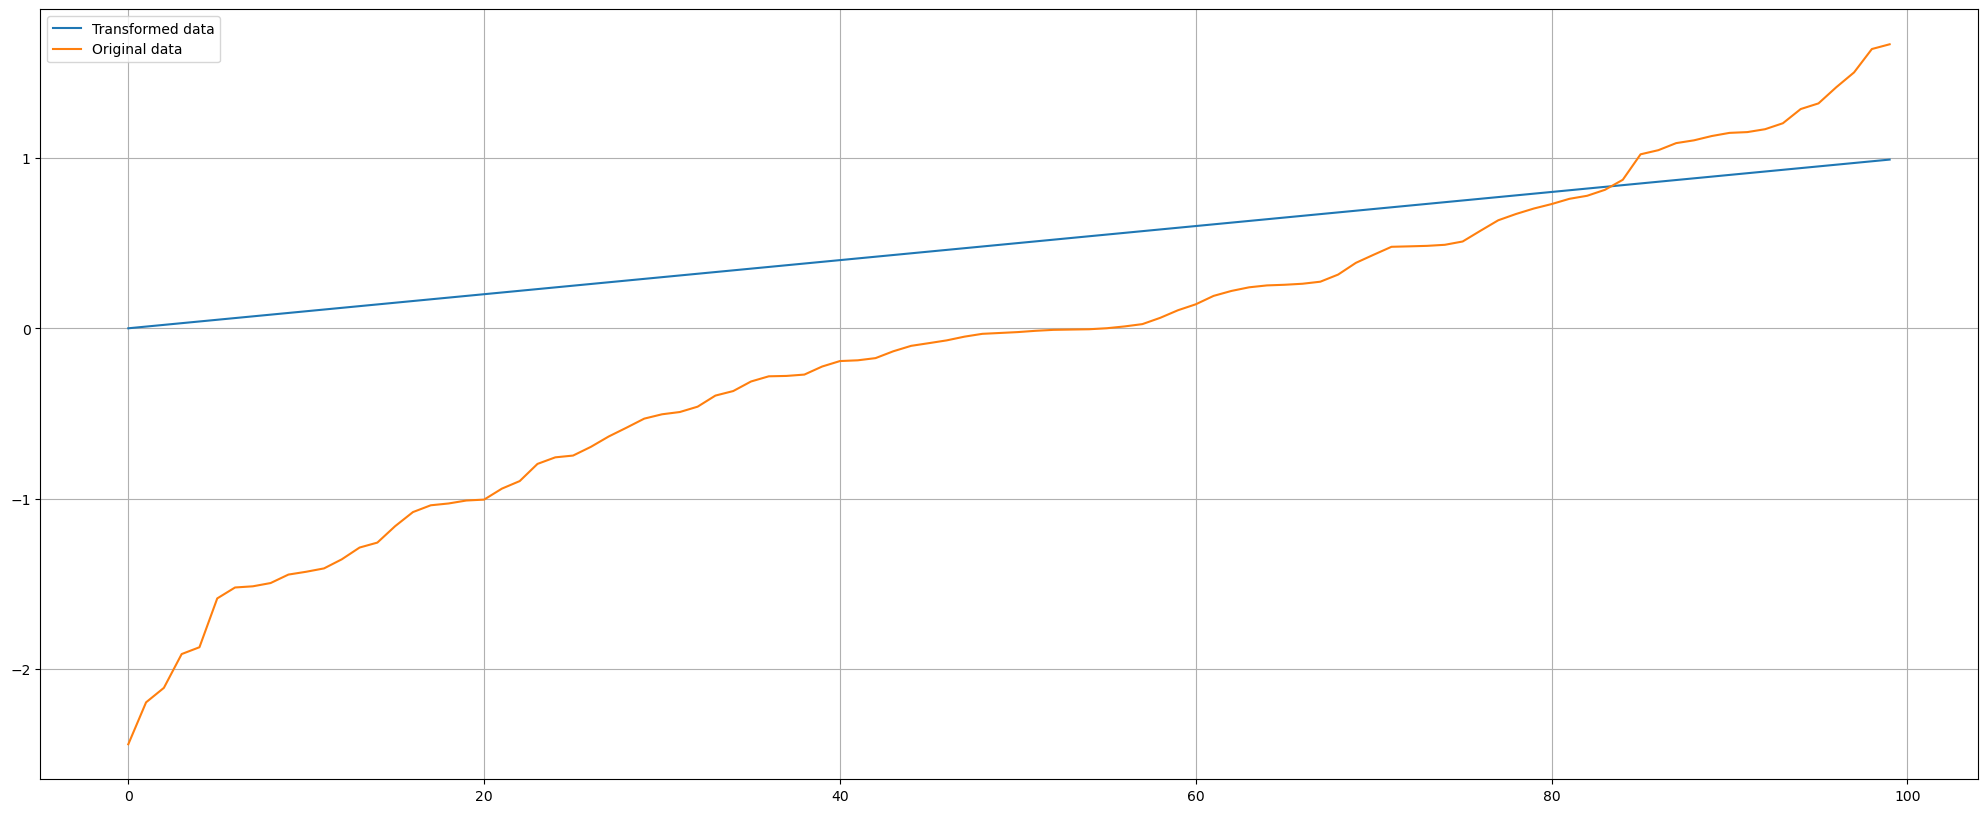

In [19]:
plt.figure(figsize=(25,10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:,0], quantiles), label='Transformed data')
plt.plot(quantiles, np.percentile(sample[:,0], quantiles), label='Original data')
plt.legend()

In [20]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

In [21]:
sample = np.random.triangular(0,1,3,size=(1000,10))

In [23]:
sample_transformed = quantile_transformer.fit_transform(sample)

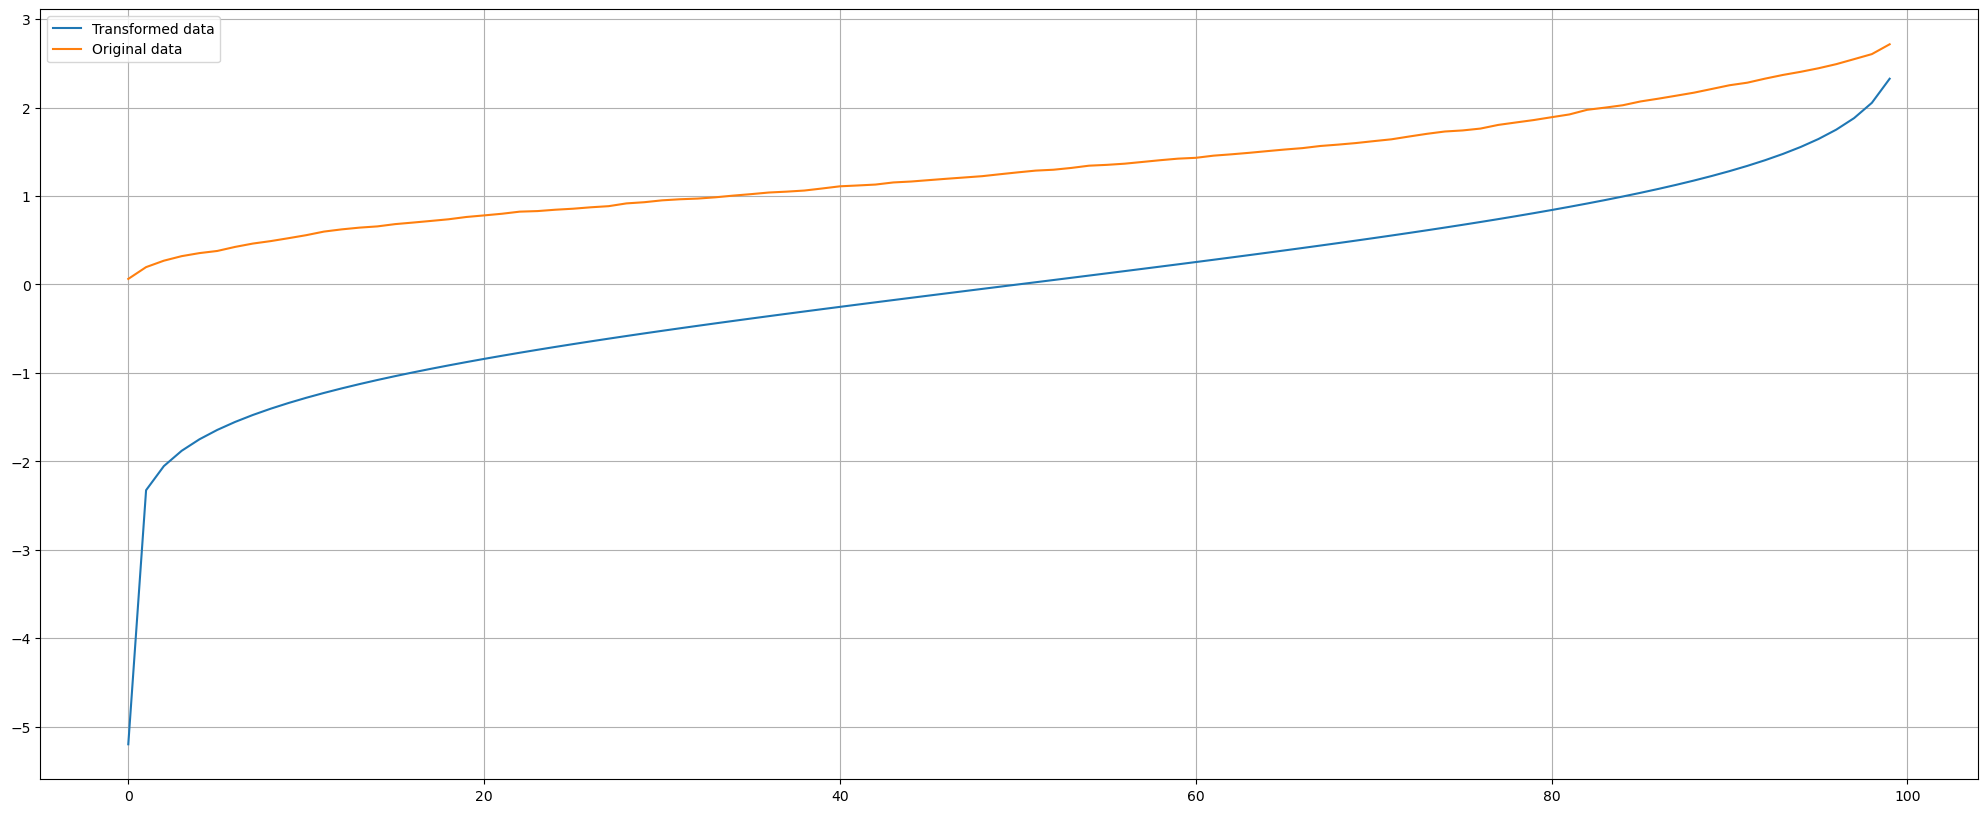

In [24]:
plt.figure(figsize=(25,10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:,0], quantiles), label='Transformed data')
plt.plot(quantiles, np.percentile(sample[:,0], quantiles), label='Original data')
plt.legend()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f3bf09b790>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f3bf09b700>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f3bf09be50>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f3bf00c250>}

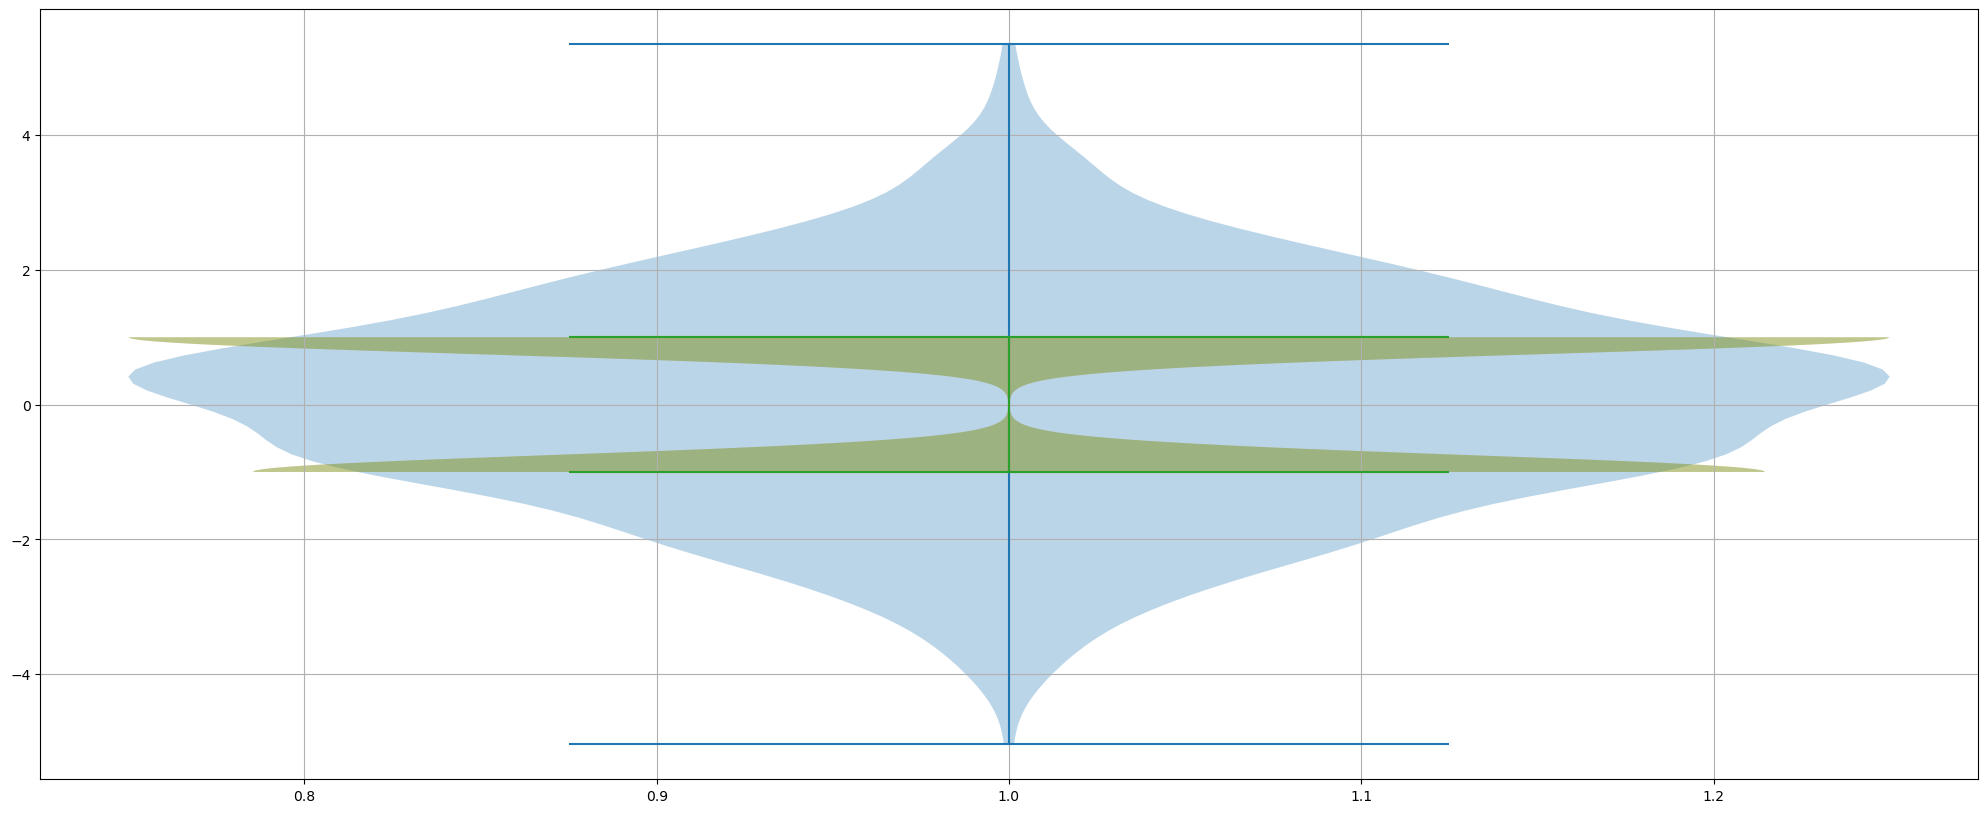

In [26]:
X = np.random.randn(1000,1)*1.5
normalizer_l2 = preprocessing.Normalizer(norm='l2').fit(X)
normalizer_l1 = preprocessing.Normalizer(norm='l1').fit(X)
X_norm_l2 = normalizer_l2.transform(X)
X_norm_l1 = normalizer_l1.transform(X)
plt.figure(figsize=(25,10))
plt.grid()
plt.violinplot(X)
plt.violinplot(X_norm_l2)
plt.violinplot(X_norm_l1)

In [28]:
from sklearn.model_selection import train_test_split

In [33]:
X_full = np.array([[[x,y] for y in np.linspace(-np.sqrt(9 - x**2), np.sqrt(9 - x**2), 50)] for x in np.arange(-3,3,0.01)])

In [34]:
X_full.shape

(600, 50, 2)

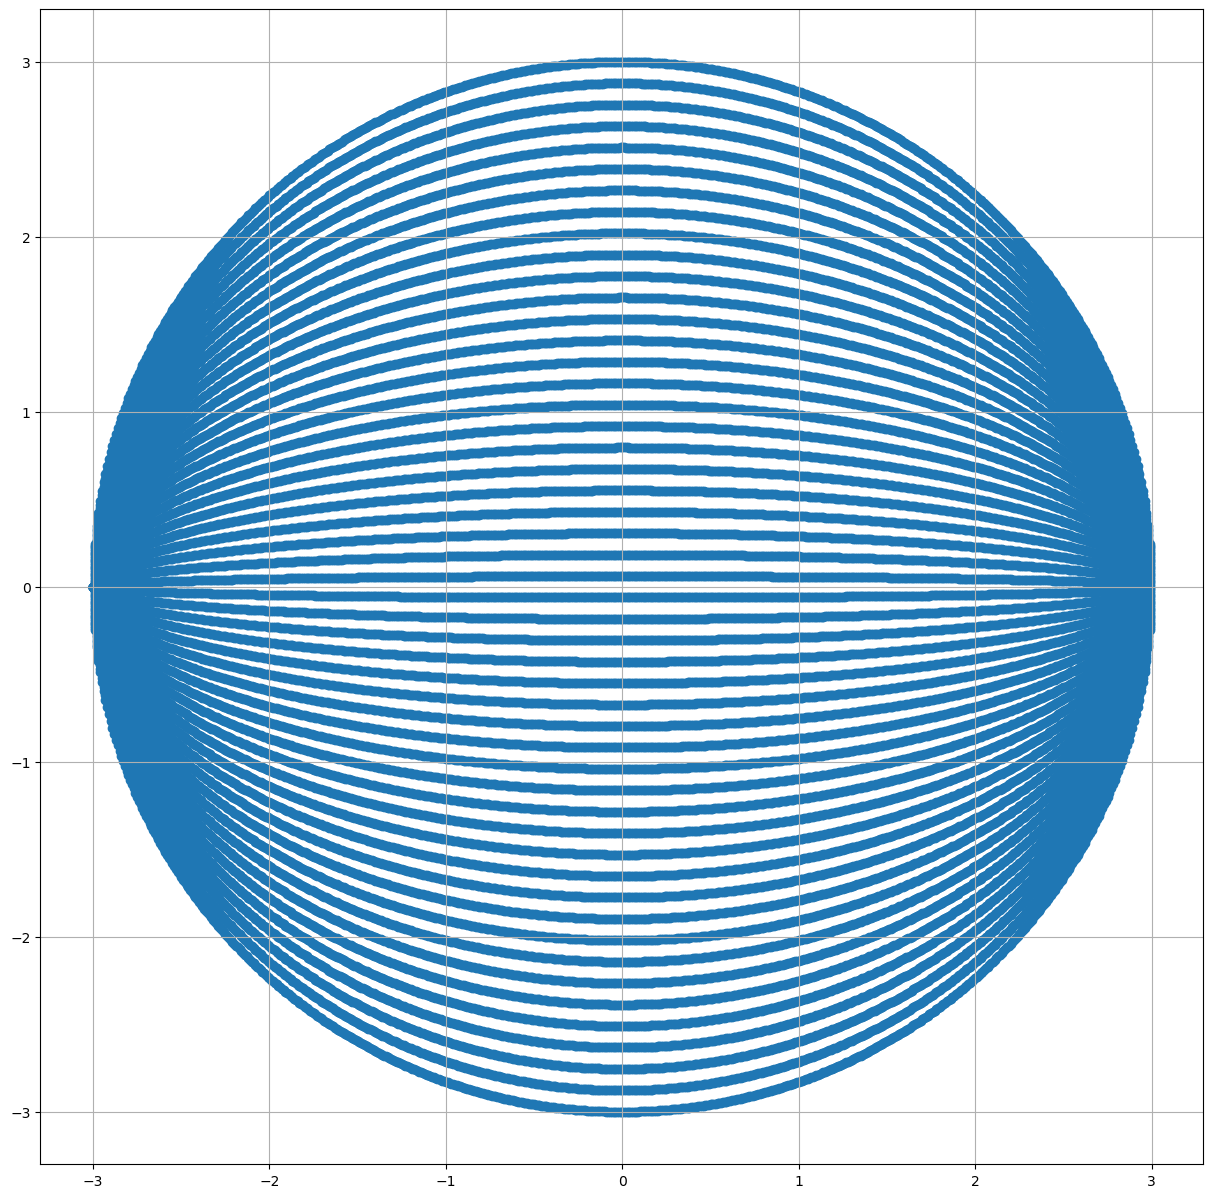

In [35]:
plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(X_full.reshape(-1,2)[:,0], X_full.reshape(-1,2)[:,1])

In [38]:
X_train, x_test, y_train, y_test = train_test_split(X_full, X_full, test_size=0.2, shuffle=False)

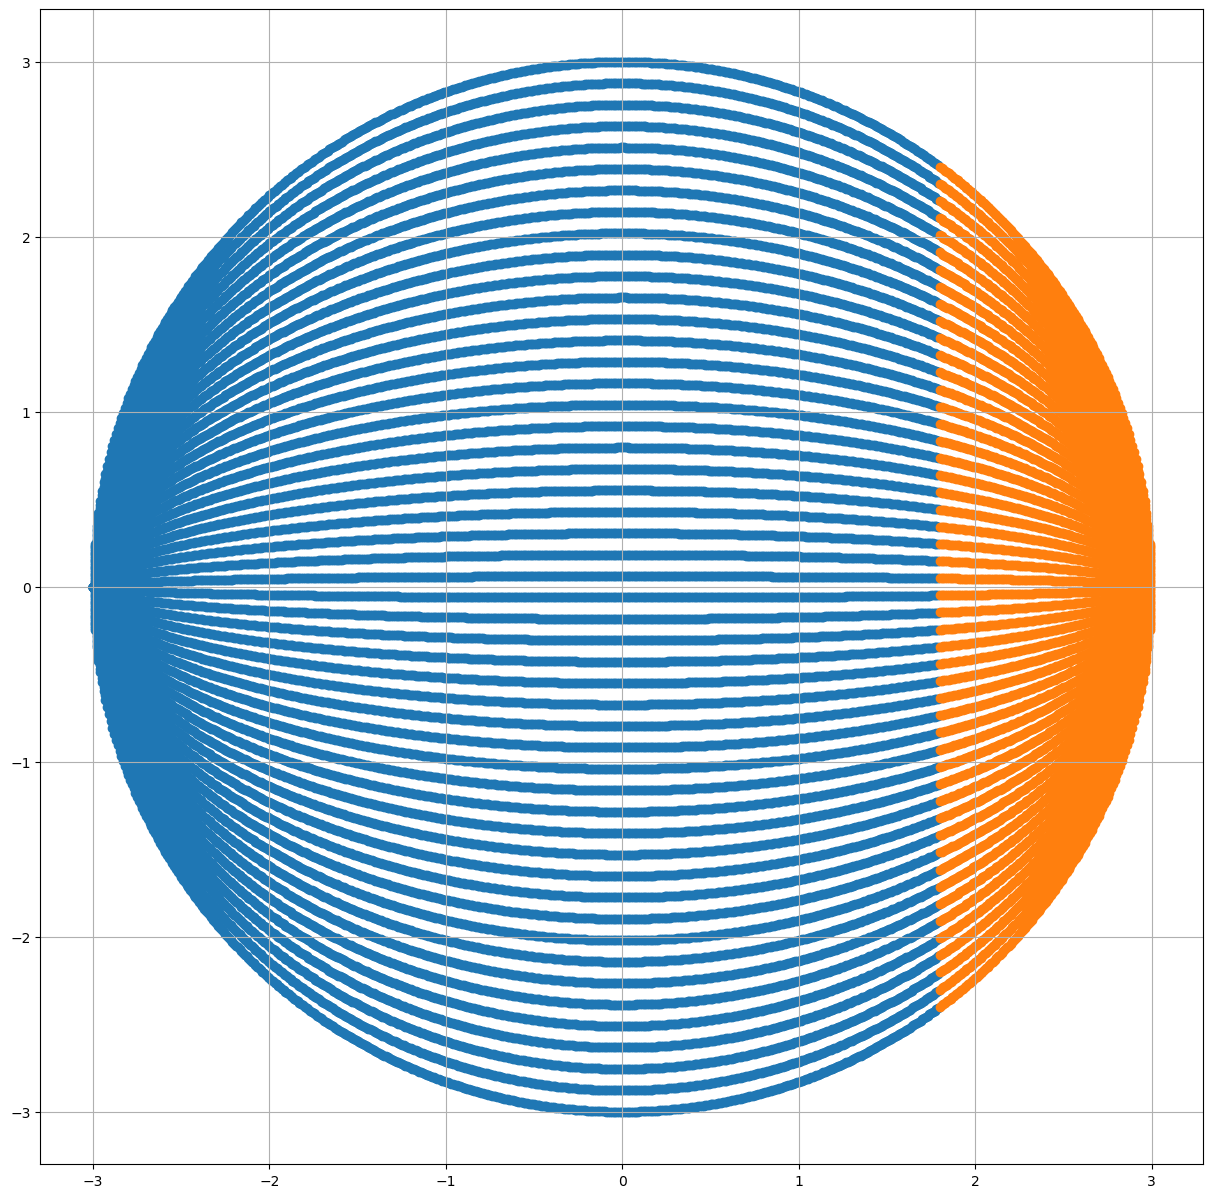

In [41]:
plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(X_train.reshape(-1,2)[:,0], X_train.reshape(-1,2)[:,1])
plt.scatter(x_test.reshape(-1,2)[:,0], x_test.reshape(-1,2)[:,1])

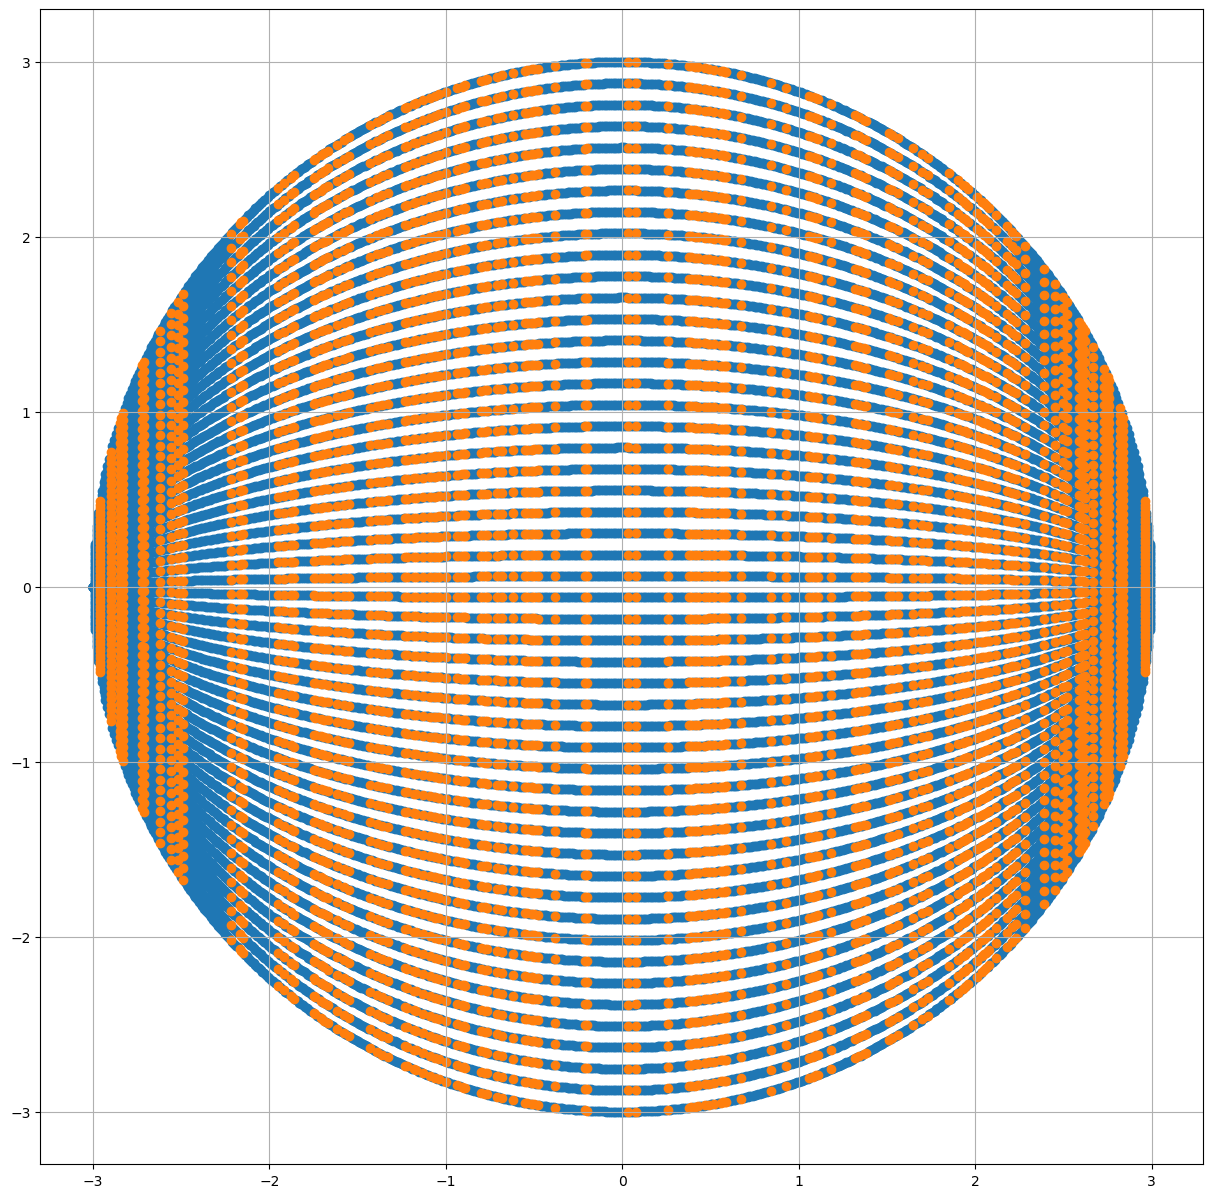

In [42]:
X_train, x_test, y_train, y_test = train_test_split(X_full, X_full, test_size=0.2, shuffle=True)

plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(X_train.reshape(-1,2)[:,0], X_train.reshape(-1,2)[:,1])
plt.scatter(x_test.reshape(-1,2)[:,0], x_test.reshape(-1,2)[:,1])